# <center> Составление расписания экзаменов<center>

## Используемые библиотеки

In [1]:
import pandas as pd # Для обработки и анализа данных (для таблиц)
import networkx as nx # Для работы с графами
import matplotlib.pyplot as plt # Для отображения данных
import random

## Входные данные

In [2]:
data = pd.read_excel('database.xlsx', index_col = 0)
data.head(5)

,Главная,Дополнительная,Data Science,Алгебра,Алгоритмы,Анатомия,Биоинформатика,Биохимия,Ботаника,Введение в программирование,...,Программирование Физика,Проектирование БД,Робототехника,Теория вероятности I,Теория вероятности II,Термодинамика,Физическая геология,Цитология,Численные методы,Экология
Абрамов Егор,Программист,NaN,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
Абрамова Вероника,Программист,NaN,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Александрова Анна,Программист,NaN,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Алексеев Степан,Программист,NaN,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
Алексеев Александр,Математик,NaN,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## Предварительная обработка данных

In [3]:
# Удалим столбцы с главной и дополнительной специальностью.
data = data.drop(['Главная', 'Дополнительная'], axis=1)
data.head(5)

,Data Science,Алгебра,Алгоритмы,Анатомия,Биоинформатика,Биохимия,Ботаника,Введение в программирование,Генетика,География,...,Программирование Физика,Проектирование БД,Робототехника,Теория вероятности I,Теория вероятности II,Термодинамика,Физическая геология,Цитология,Численные методы,Экология
Абрамов Егор,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
Абрамова Вероника,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Александрова Анна,True,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Алексеев Степан,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
Алексеев Александр,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [4]:
data_T = data.T 
data_T.head(5)

,Абрамов Егор,Абрамова Вероника,Александрова Анна,Алексеев Степан,Алексеев Александр,Алексеев Максим,Алексеева Вера,Алексеева София,Андреева Карина,Андрианов Родион,...,Чернышева Вероника,Шаров Александр,Шевелева Ангелина,Шестакова Нина,Шувалова Елизавета,Щербаков Николай,Щербаков Даниил,Щербакова Ксения,Щукин Пётр,Яковлева Василиса
Data Science,True,True,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
Алгебра,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Алгоритмы,False,False,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Анатомия,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Биоинформатика,False,False,False,False,False,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False


In [5]:
list_students = list(data_T.columns)[:]
list_students

['Абрамов Егор',
 'Абрамова Вероника',
 'Александрова Анна',
 'Алексеев Степан',
 'Алексеев Александр',
 'Алексеев Максим',
 'Алексеева Вера',
 'Алексеева София',
 'Андреева Карина',
 'Андрианов Родион',
 'Анисимов Александр',
 'Анисимова Нина',
 'Антонов Александр',
 'Афанасьев Михаил',
 'Баженова Ева',
 'Баженова Алиса',
 'Баранова Вера',
 'Белова Вероника',
 'Беляков Арсений',
 'Беляков Илья',
 'Бирюков Андрей',
 'Блинов Лев',
 'Богомолов Владислав',
 'Богомолова Алиса',
 'Болдырев Денис',
 'Борисов Мирон',
 'Борисов Андрей',
 'Бородин Роберт',
 'Бочаров Иван',
 'Бычков Макар',
 'Бычкова Ксения',
 'Васильева Полина',
 'Власов Георгий',
 'Власова Мария',
 'Волков Сергей',
 'Волков Николай',
 'Волкова София',
 'Волкова Кристина',
 'Воробьев Егор',
 'Гордеев Тимофей',
 'Горелов Артём',
 'Горшков Елисей',
 'Грачев Дмитрий',
 'Грачева Ева',
 'Губанова Анна',
 'Данилова Мария',
 'Дементьев Юрий',
 'Денисов Андрей',
 'Дмитриев Артемий',
 'Дмитриева Алина',
 'Егоров Алексей',
 'Егоров Иван'

In [6]:
list_course = data_T._stat_axis.values.tolist()
list_course

['Data Science',
 'Алгебра',
 'Алгоритмы',
 'Анатомия',
 'Биоинформатика',
 'Биохимия',
 'Ботаника',
 'Введение в программирование',
 'Генетика',
 'География',
 'Геометрия',
 'Геотектоника',
 'Геохимия',
 'Гляциология',
 'Зоология',
 'Искусственный интеллект',
 'Квантовая механика',
 'Комплексные системы',
 'Линейная алгебра',
 'Линейное программирование',
 'Математическая статистика I',
 'Математическая статистика II',
 'Математический анализ I',
 'Математический анализ II',
 'Материаловедение',
 'Машинное обучение',
 'Механика',
 'Микробиология',
 'Нанотехнологии',
 'Программирование С++',
 'Программирование Физика',
 'Проектирование БД',
 'Робототехника',
 'Теория вероятности I',
 'Теория вероятности II',
 'Термодинамика',
 'Физическая геология',
 'Цитология',
 'Численные методы',
 'Экология']

In [7]:
list_courses = []
for student in list_students:
    list_courses.append(list(data_T.loc[data_T[student]].index))

ValueError: Cannot index with multidimensional key

In [8]:
print(list_courses)

[['Data Science', 'Искусственный интеллект', 'Машинное обучение', 'Программирование С++', 'Проектирование БД'], ['Data Science', 'Введение в программирование', 'Искусственный интеллект', 'Машинное обучение', 'Программирование С++'], ['Data Science', 'Алгоритмы', 'Введение в программирование', 'Машинное обучение', 'Программирование С++'], ['Алгоритмы', 'Введение в программирование', 'Искусственный интеллект', 'Программирование С++', 'Численные методы'], ['Алгебра', 'Линейное программирование', 'Математическая статистика I', 'Математический анализ I', 'Теория вероятности I'], ['Биоинформатика', 'Биохимия', 'Зоология', 'Искусственный интеллект', 'Программирование С++'], ['Линейное программирование', 'Математическая статистика I', 'Математический анализ I', 'Теория вероятности I', 'Теория вероятности II'], ['Биохимия', 'Ботаника', 'Генетика', 'Зоология', 'Микробиология'], ['Data Science', 'Искусственный интеллект', 'Машинное обучение', 'Программирование С++', 'Численные методы'], ['Data Sc

## Представление в виде графа

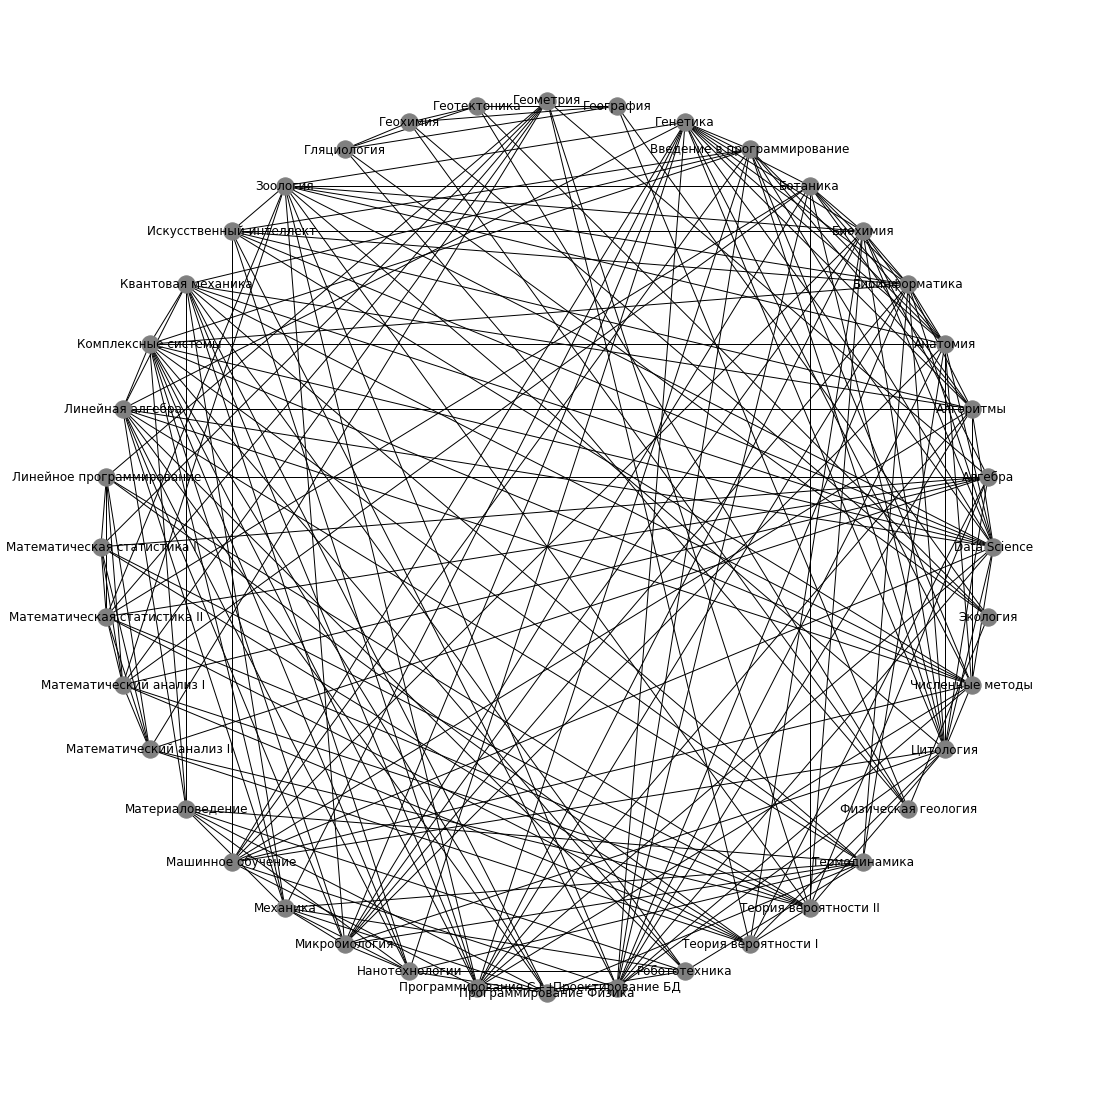

In [9]:
graph_courses = nx.Graph()
graph_courses.add_nodes_from(list_course)
import itertools
for sublist in list_courses:
    for pair in itertools.combinations(sublist, 2):
        graph_courses.add_edge(pair[0], pair[1])
plt.figure(figsize=(15,15))
nx.draw(graph_courses,pos=nx.circular_layout(graph_courses),node_color = 'grey',with_labels = True)
plt.show()

## Параметры графа

In [10]:
n_nodes = len(list(graph_courses.nodes))
n_edges_pos = (n_nodes*(n_nodes-1))/2
n_edges = len(list(graph_courses.edges))

print(f'Количество вершин в графе: {n_nodes}')
print(f'Количество ребер в полном графе: {n_edges_pos}')
print(f'Количество ребер в данном графе: {n_edges}')

Количество вершин в графе: 40
Количество ребер в полном графе: 780.0
Количество ребер в данном графе: 209


In [11]:
deg = max(dict(graph_courses.degree).values())
print(f'Максимальная степень вершины: {deg}')

Максимальная степень вершины: 16


Список цветов:

In [12]:
colors = [ "darkorange", "moccasin","blueviolet", "magenta", "blue", "gold", "yellow",
          "darkolivegreen", "chartreuse","forestgreen", "lime", "mediumaquamarine", "turquoise", 
          "teal", "cadetblue","lightcoral", "red", "lightgray", "chocolate",
          "dogerblue", "blue", "slateblue"]

Генерация экзаменационных дат и времени:

In [13]:
from datetime import datetime
dates = []
calendar = {}
for i in list(range(1,31)):
    for j in list(range(8,9)):
        date = datetime(2023, 12, i, j, 0)
        dates.append(date)
        calendar[date] = []

In [14]:
from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}

## Алгоритм раскраски графа

In [15]:
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes()) 
    random.shuffle(nodes) 
    for node in nodes:
        dict_adjacent = dict(network[node])
        nodes_adjacent = list(dict_adjacent.keys())
        bancolors = []
        for adjacent in nodes_adjacent:
            if len(network.nodes.data()[adjacent].keys()) == 0: 
                continue
            else:
                bancolor = network.nodes.data()[adjacent]
                bancolor = bancolor['color']
                bancolors.append(bancolor)
        for color in colors:
            if color in bancolors:
                continue
            else:
                network.nodes[node]['color'] = color
                break

## Раскраска графа. Решение

In [16]:
greedy_coloring_algorithm(graph_courses, colors)

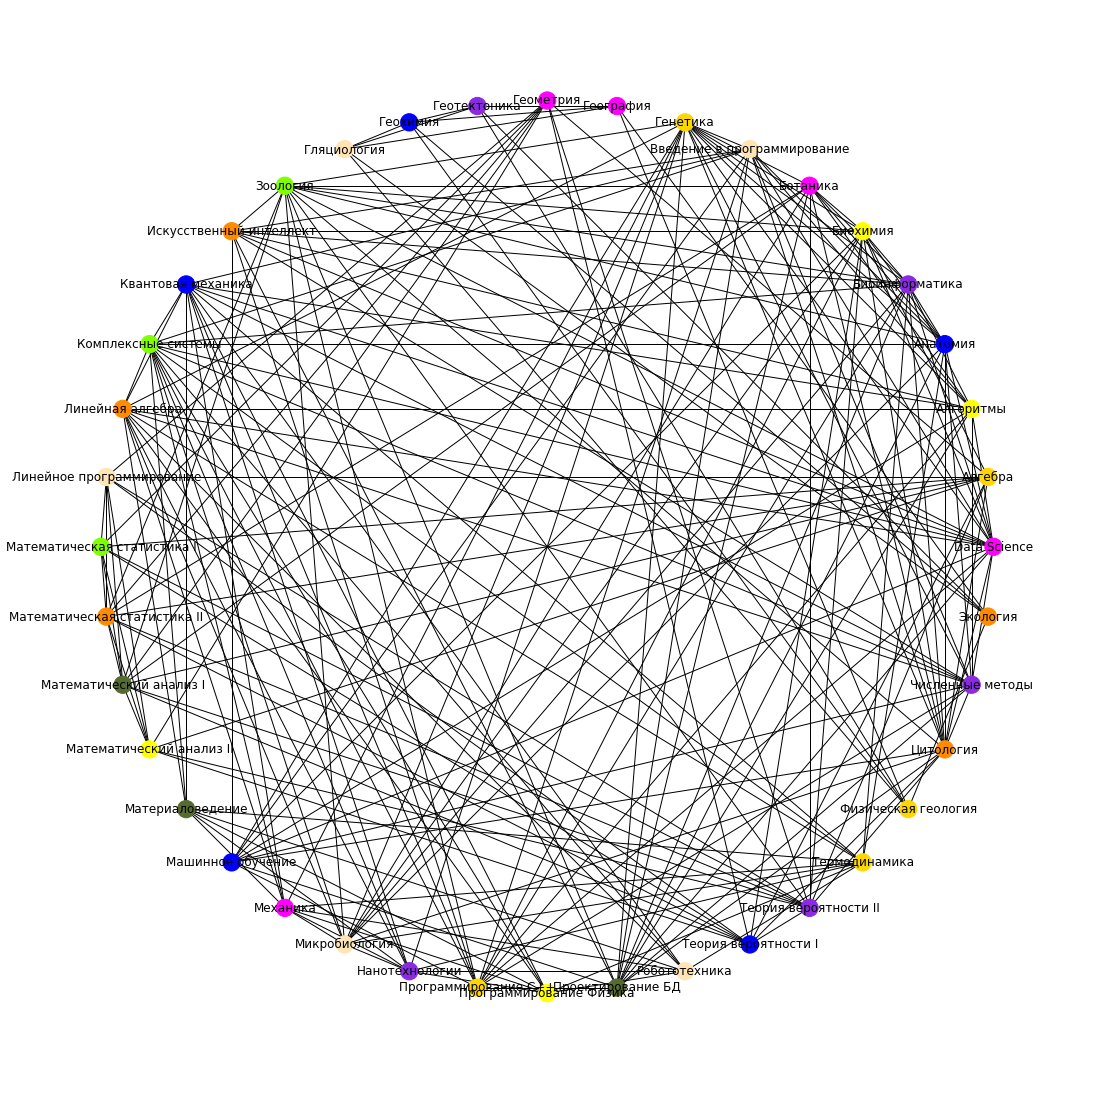

In [17]:
colors_nodes = [data['color'] 
for v, data in graph_courses.nodes(data=True)]
plt.figure(figsize=(15,15))
nx.draw(graph_courses, pos=nx.circular_layout(graph_courses), node_color=colors_nodes, with_labels=True)
plt.show()

In [18]:
colors_used = list(set(colors_nodes))
print('Количество используемых цветов: ', len(colors_used))
print('Используемые цвета: ', colors_used)

Количество используемых цветов:  9
Используемые цвета:  ['darkolivegreen', 'blue', 'yellow', 'gold', 'darkorange', 'blueviolet', 'moccasin', 'magenta', 'chartreuse']


## Список вершин и их цвет

In [19]:
for col in colors_used :
    for v,data in graph_courses.nodes(data=True):
        if data['color'] == col:
            print(f'Цвет: {col}, соответствующий предмет: {v}')

Цвет: darkolivegreen, соответствующий предмет: Математический анализ I
Цвет: darkolivegreen, соответствующий предмет: Материаловедение
Цвет: darkolivegreen, соответствующий предмет: Проектирование БД
Цвет: blue, соответствующий предмет: Анатомия
Цвет: blue, соответствующий предмет: Геохимия
Цвет: blue, соответствующий предмет: Квантовая механика
Цвет: blue, соответствующий предмет: Машинное обучение
Цвет: blue, соответствующий предмет: Теория вероятности I
Цвет: yellow, соответствующий предмет: Алгоритмы
Цвет: yellow, соответствующий предмет: Биохимия
Цвет: yellow, соответствующий предмет: Математический анализ II
Цвет: yellow, соответствующий предмет: Программирование Физика
Цвет: gold, соответствующий предмет: Алгебра
Цвет: gold, соответствующий предмет: Генетика
Цвет: gold, соответствующий предмет: Программирование С++
Цвет: gold, соответствующий предмет: Термодинамика
Цвет: gold, соответствующий предмет: Физическая геология
Цвет: darkorange, соответствующий предмет: Искусственный и

## Расписание экзаменов. Представление решения в виде таблицы

In [20]:
for v, data in graph_courses.nodes(data=True):
    calendar[from_color_to_date[data['color']]].append(v)
    
max_number_exams_sync = len(max(list(calendar.values()),key=len))

rooms = ["Аудитория "+str(i) for i in list(range(max_number_exams_sync))]

pd.DataFrame.from_dict(calendar, orient='index', columns=rooms)

,Аудитория 0,Аудитория 1,Аудитория 2,Аудитория 3,Аудитория 4
2023-12-01 08:00:00,Искусственный интеллект,Линейная алгебра,Математическая статистика II,Цитология,Экология
2023-12-02 08:00:00,Введение в программирование,Гляциология,Линейное программирование,Микробиология,Робототехника
2023-12-03 08:00:00,Биоинформатика,Геотектоника,Нанотехнологии,Теория вероятности II,Численные методы
2023-12-04 08:00:00,Data Science,Ботаника,География,Геометрия,Механика
2023-12-05 08:00:00,None,None,None,None,None
2023-12-06 08:00:00,Алгебра,Генетика,Программирование С++,Термодинамика,Физическая геология
2023-12-07 08:00:00,Алгоритмы,Биохимия,Математический анализ II,Программирование Физика,None
2023-12-08 08:00:00,Математический анализ I,Материаловедение,Проектирование БД,None,None
2023-12-09 08:00:00,Зоология,Комплексные системы,Математическая статистика I,None,None
2023-12-10 08:00:00,None,None,None,None,None
